# Tarea 3. Minería de texto básica
Guillermo Segura Gómez

## Selección de términos y DTR

**1. Programa y visualiza TCOR.** 

Puede hacer esto de forma similar a como el profesor lo hizo en la Práctica 4 con DOR. El pesado puede ser el que el profesor sugirió en clase TCOR o PPMI como lo sugiere Dan Jurafsky; hacer al menos dos gráficas, la de constelación de palabras y subconjunto para ver algunas palabras con flechas. 

---

**DTR: Distributed Text Representations**
Las Representaciones de Texto Distribuidas (DTR) se refieren a cualquier tipo de representación de texto que distribuye la información sobre las palabras o frases a través de múltiples dimensiones de un vector. Estas representaciones pueden capturar diferentes aspectos del lenguaje, como la semántica, la sintaxis, y la co-ocurrencia de términos.

**DOR: Document Occurrence Representations**
Las DOR (Document Occurrence Representations) son representaciones basadas en la ocurrencia de términos a nivel de documentos. Por ejemplo la matriz de términos por documentos, donde cada fila representa un término y cada columna un documento, y los valores indican la presencia o la frecuencia de los términos en los documentos. 

**TCOR: Term Co-occurrence Representations**
Las DTR (Term Co-occurrence Representations) se enfocan en cómo los términos co-ocurren dentro de contextos específicos, como documentos o ventanas de palabras dentro de un texto. Construimos estas representaciones a partir de matrices de co-ocurrencia, donde las filas y columnas representan términos y los valores reflejan cuán frecuentemente los pares de términos aparecen juntos. 

Este tipo de representaciones son bastante útiles cuando se trata de textos cortos, incluso pudiendo superar a la bolsa de palabras. La representación DOR se realizó en la práctica 4. Para construir la representación TCOR seguimos el mismo procedimiento. 

In [1]:
# Función que extrae el texto de dos archivos. Uno el de los documentos, otro el de las etiquetas
def get_text_from_file(path_corpus, path_truth):

    tr_text = []
    tr_labels = []

    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_text += [tweet]
        for label in f_truth:
            tr_labels += [label]

    return tr_text, tr_labels

In [151]:
path_text = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_train.txt"
path_labels = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_train_labels.txt"

path_text_val = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_val.txt"
path_labels_val = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_val_labels.txt"

tr_text, tr_labels = get_text_from_file(path_text, path_labels) # Importamos los datos de entrenamiento
val_text, val_labels = get_text_from_file(path_text_val, path_labels_val) # Importamos los datos de test o validación

Una vez teniendo el corpus cargado en listas, utilizamos el tokenizador `TweetTokenizer` de la librería **nltk** para tokenizar el texto. 

In [3]:
import nltk
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer() # Inicializar tokenizer

corpus_palabras = []

for doc in tr_text:
    corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

print(f"El tamaño del corpus es:", len(corpus_palabras))
print(f"El tamaño del vocabulario es:", len(fdist))

El tamaño del corpus es: 97473
El tamaño del vocabulario es: 15194


In [4]:
# Función para ordenar las frecuencias
def  SortFrecuency(freqdist):
    # List comprenhension
    aux = [(freqdist[key], key) for key in freqdist]
    aux.sort() # Ordena la lista
    aux.reverse() # Cambiar el orden

    return aux

In [5]:
# Ordenamos y obtenemos el vocabulario
voc = SortFrecuency(fdist)
voc = voc[:5000]
voc[:5]

[(3016, ','), (2915, 'de'), (2829, 'que'), (2604, '.'), (2031, 'la')]

Ahora, necesitamos crear un diccionario para facilitar el trabajo de la creación de la bolsa de conceptos

In [6]:
dict_indices = dict()
count = 0

for weight, word in voc:
    dict_indices[word] = count
    count += 1

dict_indices

{',': 0,
 'de': 1,
 'que': 2,
 '.': 3,
 'la': 4,
 'a': 5,
 'y': 6,
 '!': 7,
 'no': 8,
 '@USUARIO': 9,
 'me': 10,
 'el': 11,
 'en': 12,
 'se': 13,
 'es': 14,
 'con': 15,
 '?': 16,
 'verga': 17,
 'los': 18,
 'madre': 19,
 'por': 20,
 'las': 21,
 '"': 22,
 'un': 23,
 'te': 24,
 'mi': 25,
 'lo': 26,
 'putas': 27,
 'una': 28,
 '...': 29,
 'putos': 30,
 'para': 31,
 '😂': 32,
 'si': 33,
 'ya': 34,
 'como': 35,
 'su': 36,
 'pero': 37,
 'tu': 38,
 'loca': 39,
 'le': 40,
 'más': 41,
 'No': 42,
 'del': 43,
 'gorda': 44,
 'al': 45,
 'bien': 46,
 'A': 47,
 '¿': 48,
 'Y': 49,
 'son': 50,
 'Me': 51,
 'o': 52,
 'feas': 53,
 'cuando': 54,
 'Que': 55,
 ':': 56,
 'yo': 57,
 'les': 58,
 'porque': 59,
 'ni': 60,
 'está': 61,
 'ser': 62,
 'estoy': 63,
 'sus': 64,
 'todos': 65,
 'esta': 66,
 'puta': 67,
 'Ya': 68,
 'todo': 69,
 'pinche': 70,
 'puto': 71,
 'tan': 72,
 'Si': 73,
 'La': 74,
 'qué': 75,
 '…': 76,
 'eso': 77,
 'muy': 78,
 'soy': 79,
 'hasta': 80,
 'así': 81,
 '¡': 82,
 '<URL>': 83,
 'mamar': 84,


Trabajamos con la bolsa de palabras de pesado binario. Recordando la función de bolsa de palabras.

In [7]:
import numpy as np

def build_bow_binary(tr_text, vocabulary, dict_indices):
    # Construcción de matriz para la bolsa de palabras
    # En cada fila vemos los documentos que estamos procesando
    # En las columnas el tamaño del vocabulario que estamos creando
    BOW = np.zeros((len(tr_text),len(vocabulary)), dtype = int)

    for idx, tr in enumerate(tr_text):

        # Cada documento tr lo tokenizamos
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))

        # Contamos cada palabra
        for word in fdist_doc:
            # Nos aseguramos que las palabras estan en el diccionario final
            if word in dict_indices:
                BOW[idx, dict_indices[word]] = 1 # Esquema de pesado binario

    return BOW

In [8]:
BOW_tr = build_bow_binary(tr_text, voc, dict_indices)
BOW_tr[:10][:10]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

### Implementación de la TCOR

La representación *Term Co-ocurrence Representation* matemáticamente el esquema de pesado que se utiliza se puede ver como sigue:

$$
w_{k, j} = tff(t_k, t_j) \cdot \log \frac{|T|}{T_k}
$$

donde 
$$
tff = 1 + log(\#(t_k, t_j)) \quad \quad if(\#(t_k, t_j) > 0) \quad otherwise \quad tff = 0
$$

- $tff(t_k, t_j)$ se refiere a cuantos documentos co-ocurrieron juntos los términos $t_k$ y $t_j$
- $|T|$ es el tamaño del vocabulario
- $T_k$ es el número de palabras distintas con el que el término $t_k$ co-ocurrió en al menos un documento en la colección.


Para la implementación partimos de la bolsa de palabras que construimos en la tarea pasada. 

Buscamos una representación de co-ocurrencias en las que formamos pares de (término, término). Esta representación es bastante útil para desambiguar el sentido de las palabras porque te dice con quien esta co-ocurriendo una palabra. La clave esta en el esquema de pesado. Nótese que la matriz es simétrica ya que la relación entre dos términos es bidireccional, entonces si estamos de k hacia j, es lo mismo de j hacia k. 

In [159]:
def compute_tcor(TR):
    # Restricciones sobre los subconjuntos de los documentos
    TR_subset_in = TR # Sin condiciones

    # Inicializamos la bolsa de conceptos (término , término)
    # Si partimos de una bolsa de palabras, las dimensiones serán una matriz cuadrada del vocabulario
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[1]), dtype=float)

    len_voc = TR_subset_in.shape[1] # Tamaño del vocabulario total
    
    # Calculamos la co-ocurrencia bruta de cada par de términos en todos los documentos
    for doc in TR:  # Itera sobre cada documento en la matriz TR
        nonzero_terms = np.nonzero(doc)[0]  # Encuentra los índices de los términos no nulos en el documento actual
        
        # Para cada par único de términos no nulos en el documento, incrementa su co-ocurrencia en la matriz TCOR
        for i in range(len(nonzero_terms)):  # Itera sobre los términos no nulos
            for j in range(i + 1, len(nonzero_terms)): 
                term1, term2 = nonzero_terms[i], nonzero_terms[j]  # Indices de los términos
                DTR[term1, term2] += 1  
                DTR[term2, term1] += 1  # Asegura la simetría de la matriz incrementando la co-ocurrencia inversa
    
    # Calcula T_k para cada término, que es el número de términos distintos con los que co-ocurre
    T_k = np.array([(DTR[i] > 0).sum() for i in range(len_voc)])  # Cuenta los términos distintos para cada término i
    
    # Aplica el pesado tff y el factor logarítmico a cada elemento no nulo de la matriz TCOR
    for i in range(len_voc):  # Itera sobre todos los términos
        for j in range(i + 1, len_voc):  
            if DTR[i, j] > 0:  # Solo aplica el cálculo a términos que co-ocurren
                tff = 1 + np.log10(DTR[i, j])  # Calcula tff
                weight = tff * np.log10(len_voc / T_k[i])
                DTR[i, j] = DTR[j, i] = weight  
    
    return DTR  


In [47]:
TCOR_base = compute_tcor(BOW_tr)
TCOR_base[:10][:10]

array([[0.        , 0.31475048, 0.31273455, ..., 0.10297198, 0.0791465 ,
        0.0791465 ],
       [0.31475048, 0.        , 0.33583065, ..., 0.08438914, 0.08438914,
        0.08438914],
       [0.31273455, 0.33583065, 0.        , ..., 0.        , 0.        ,
        0.09647594],
       ...,
       [0.26636661, 0.29116355, 0.32432584, ..., 0.34505377, 0.        ,
        0.        ],
       [0.30167284, 0.31414987, 0.36746583, ..., 0.19873353, 0.        ,
        0.19873353],
       [0.28268827, 0.30496899, 0.3395787 , ..., 0.        , 0.        ,
        0.3555361 ]])

Vamos a hacer una normalización para poder unificar los valores en los vectores y escribir todo de manera estándar. Reducir la dimensionalidad. Esto se va realizar utilizando **feature selection**. El feature selection selecciona los k mejores valores utilizando métodos estadísticos. El feature selection ya esta dentro de la librería `sklearn`. Se trata de determinar cuales son las palabras mas relevantes. Seleccionamos en este caso las 1000 palabra mas relevantes. 

Esto para hacer una gráfica de constelación de palabras. Este proceso es útil para entender visualmente cómo se agrupan las palabras en el espacio reducido, lo que puede ofrecer intuiciones sobre las relaciones semánticas entre palabras y su relevancia para las diferentes clases en los datos. Al reducir la dimensionalidad y visualizar solo las palabras más relevantes, se facilita la interpretación de grandes conjuntos de datos textuales, que de otro modo serían difíciles de analizar debido a su alta dimensionalidad.

**Selección de Características con Chi-Cuadrado (`chi2`):**
- `SelectKBest` con `chi2` se utiliza para seleccionar las `k` características más relevantes. En este caso, `k=1000`, lo que significa que se seleccionan las 1000 palabras más relevantes de la matriz Bag of Words (`BOW_tr`) basándose en la estadística Chi-Cuadrado, la cual mide la independencia entre cada término y las etiquetas de clase (`tr_labels`). Esto es útil para reducir la dimensionalidad y enfocarse en las palabras que tienen más peso en términos de su capacidad para distinguir entre las clases.

In [49]:
from sklearn.feature_selection import SelectKBest, chi2

feast = SelectKBest(chi2, k=1000)
feast.fit(BOW_tr, tr_labels)

SelectKBest(k=1000, score_func=<function chi2 at 0x146563420>)

**Extracción de las Palabras Más Importantes:**
- Después de ajustar `SelectKBest`, se utilizan los índices de las características seleccionadas (`best`) para extraer las palabras correspondientes del vocabulario original. Se crea un diccionario invertido (`dict_indices_invertido`) para mapear índices a palabras, y se utilizan estos índices para obtener las `target_words`, que son las palabras más relevantes según Chi-Cuadrado.

In [50]:
# Selección de palabras mas importantes
best = feast.get_support(indices=True)
best[:20]

array([ 0,  1,  2,  4,  5,  7,  9, 10, 11, 12, 17, 18, 19, 22, 24, 25, 28,
       30, 35, 36])

**Preparación de la Matriz para Visualización:**
- `target_matrix` se construye extrayendo las filas correspondientes a las `target_words` de la representación de matriz base (`TCOR_base`), que es la matriz de co-ocurrencia. Esta matriz representa solo las palabras más relevantes en el espacio de características original.

Ahora vamos a construir un diccionario invertido. Es decir teníamos un diccionario que accedía a la frecuencia en función de la palabra, ahora accedemos a la palabra en función de la frecuencia. 

In [51]:
dict_indices_invertido = {}
for w in dict_indices:
    dict_indices_invertido[dict_indices[w]] = w

In [52]:
# Palabras target, después de filtrar las 1000 mas relevantes
target_words = [dict_indices_invertido[index] for index in best]
target_words[:20]

[',',
 'de',
 'que',
 'la',
 'a',
 '!',
 '@USUARIO',
 'me',
 'el',
 'en',
 'verga',
 'los',
 'madre',
 '"',
 'te',
 'mi',
 'una',
 'putos',
 'como',
 'su']

Reducimos el número de palabras en la matriz TCOR, y asi nos quedamos con la matriz objetivo

In [53]:
target_matrix = np.array([TCOR_base[dict_indices[word]] for word in target_words])

In [54]:
target_matrix.shape

(1000, 5000)

Las 1000 palabras mas relevantes en los documentos. 

**Reducción de Dimensionalidad con t-SNE:**
- t-SNE (t-Distributed Stochastic Neighbor Embedding) es un algoritmo utilizado para la reducción de la dimensionalidad, ideal para visualización de datos de alta dimensión en un espacio de baja dimensión (en este caso, 2D). `tsne.fit_transform(target_matrix)` reduce la dimensionalidad de `target_matrix` para permitir una representación visual en un espacio bidimensional.

In [55]:
from sklearn.manifold import TSNE

# Crea una instancia de TSNE
tsne = TSNE(n_components=2)  # n_components=2 indica el número de dimensiones a las que quieres reducir tus datos

# Utiliza fit_transform para reducir la dimensionalidad
reduced_matrix = tsne.fit_transform(target_matrix)

Parámetros para graficar. La gráfica nos va permitir visualizar las correlaciones entre las palabras. Además también podemos visualizar las stopwords dentro del mapa.

In [56]:
max_x = np.amax(reduced_matrix, axis = 0)[0]
max_y = np.amax(reduced_matrix, axis = 0)[1]

In [129]:
reduced_matrix.shape

(1000, 2)

**Visualización:**
- Finalmente, se utiliza Matplotlib para crear una visualización en la que cada punto representa una de las 1000 palabras más relevantes, y las coordenadas de estos puntos se basan en la representación de 2 dimensiones obtenida con t-SNE. Se anotan las palabras en el gráfico, con palabras comunes (stopwords) en rojo para distinguirlas.

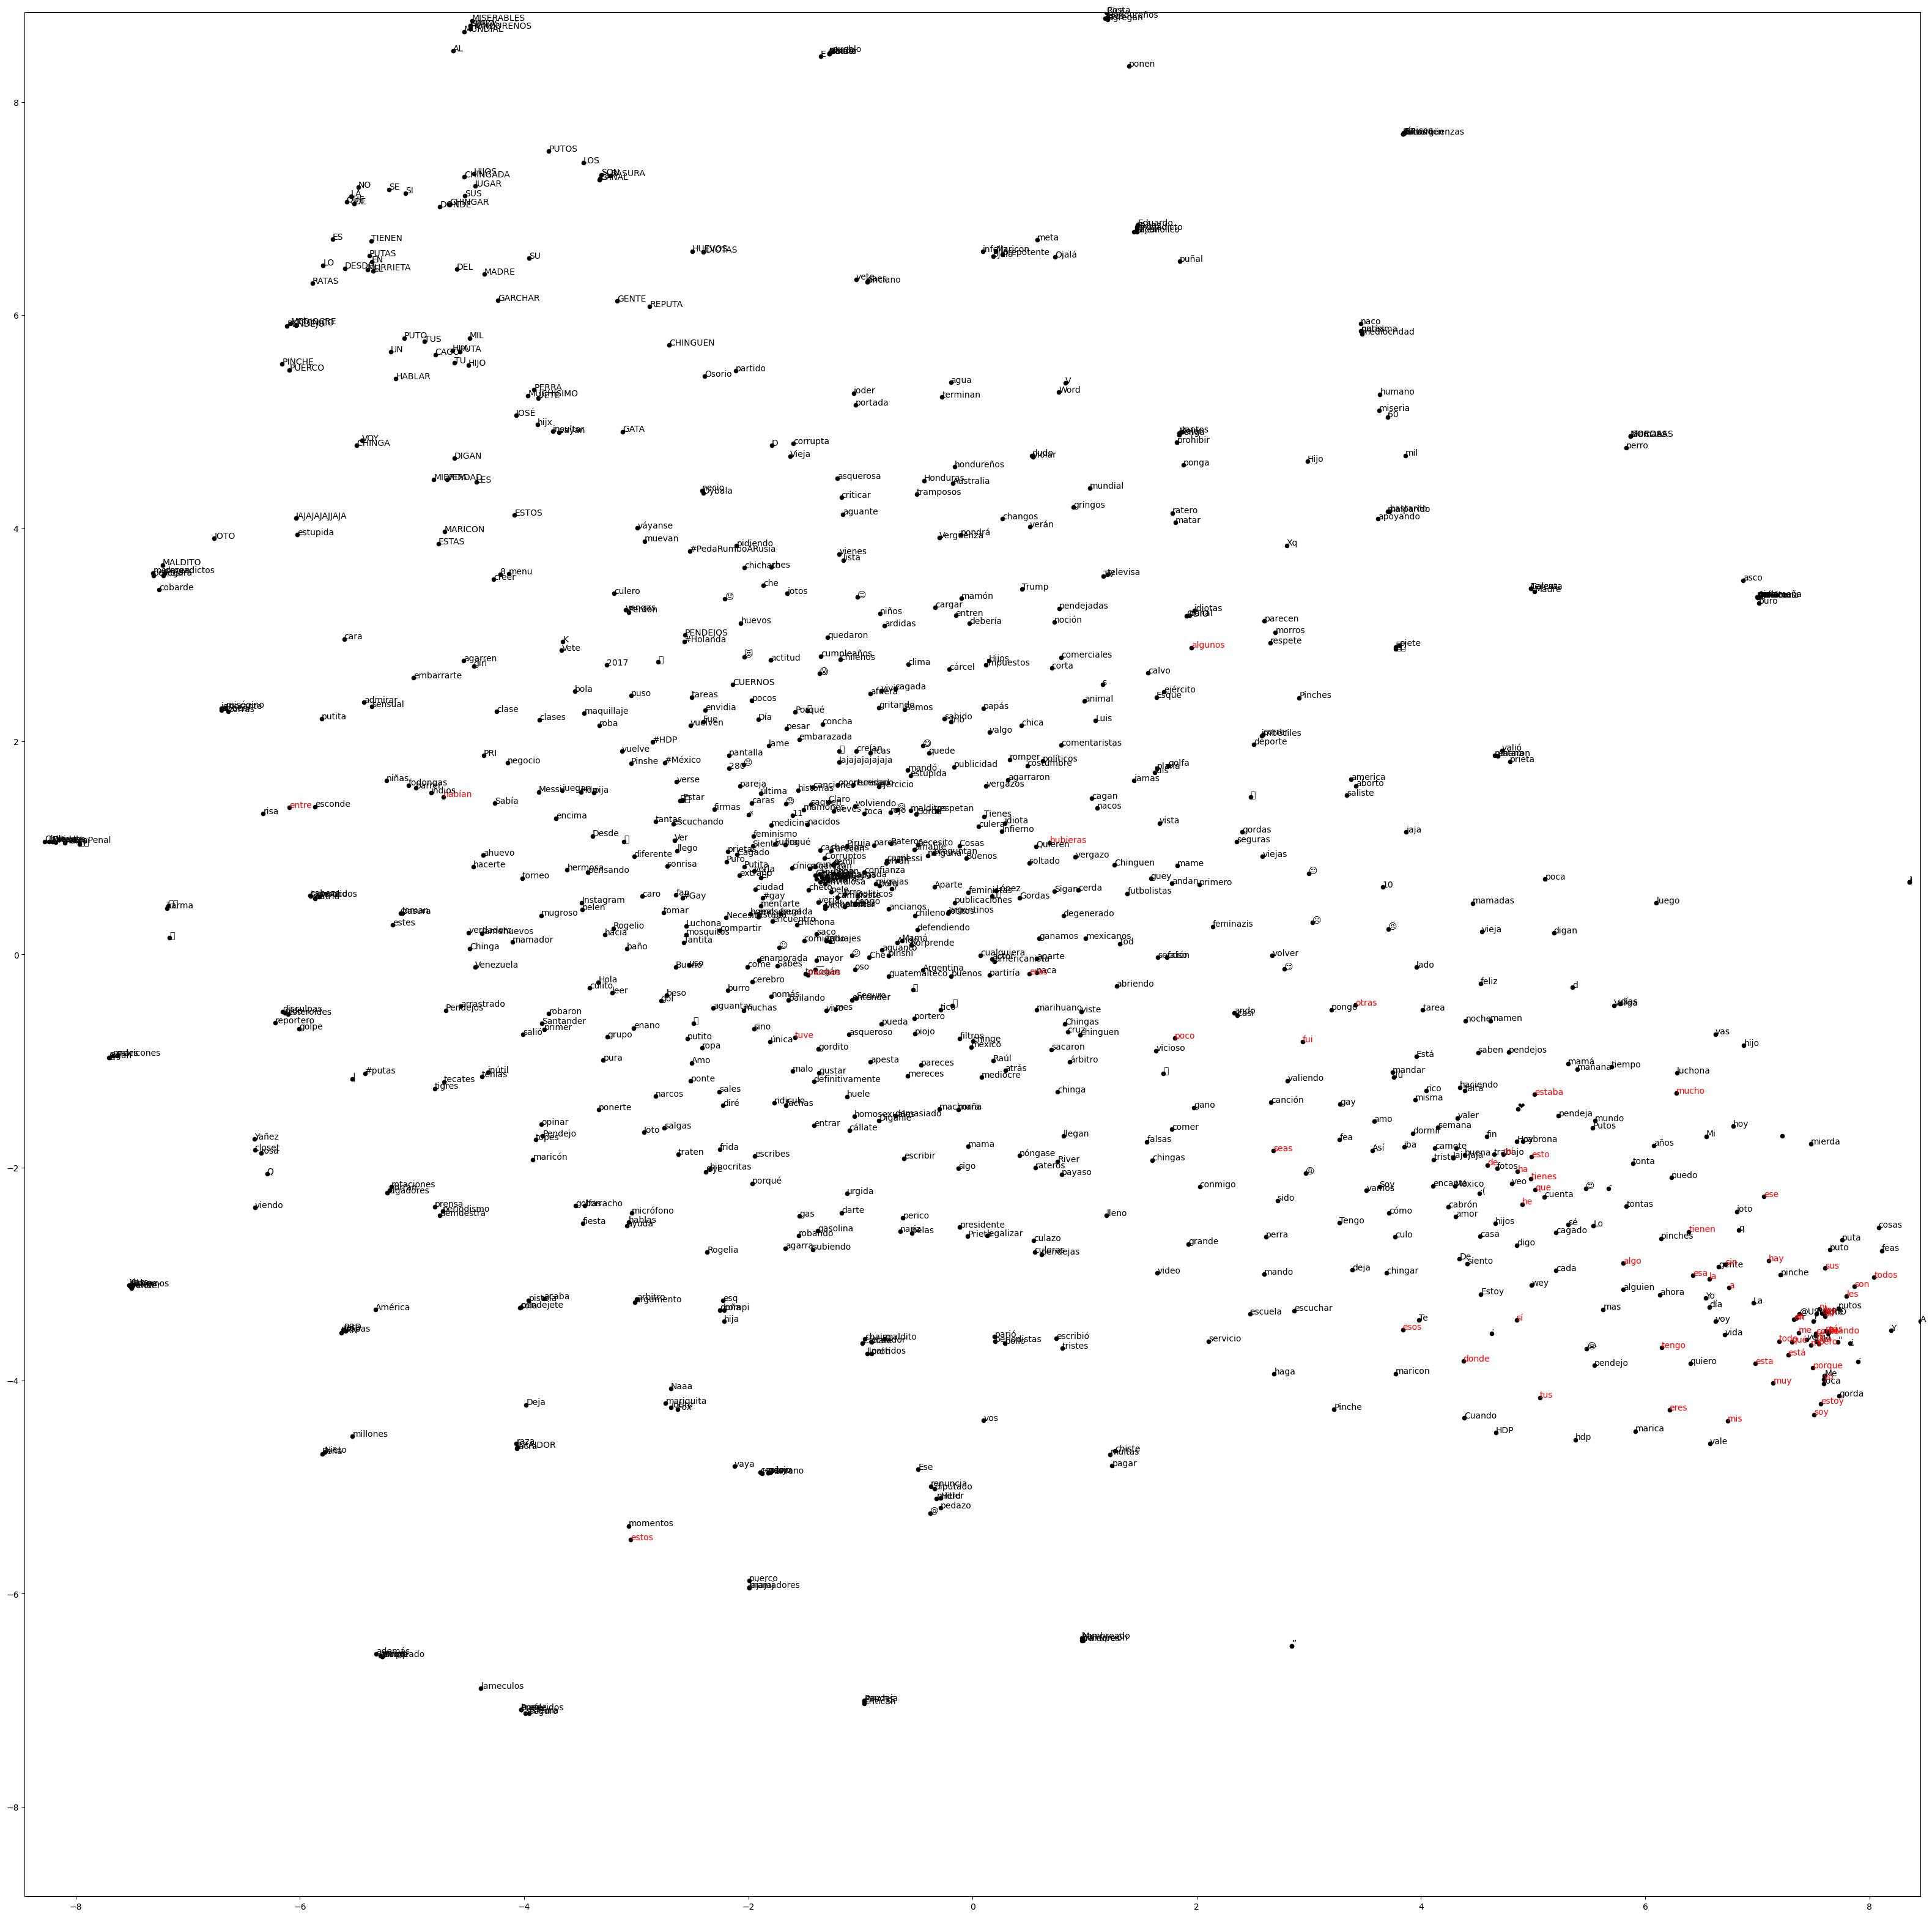

In [57]:
import matplotlib.pyplot as plt
import warnings
import nltk
nltk.data.path.append('/Users/guillermo_sego/anaconda3/nltk_data/') # path

# Suprimir advertencias
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
sw = set(stopwords.words("spanish"))

plt.figure(figsize=[40, 40], dpi=100)
plt.xlim((-max_x, max_x))
plt.ylim((-max_y, max_y))

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black")

for idx, word in enumerate(target_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    
    if word in sw:
        plt.annotate(word, (x, y), color="red")
    else:
        plt.annotate(word, (x, y), color="black")



Las palabras con contextos similares se comienzan a agrupar en esta representación. 

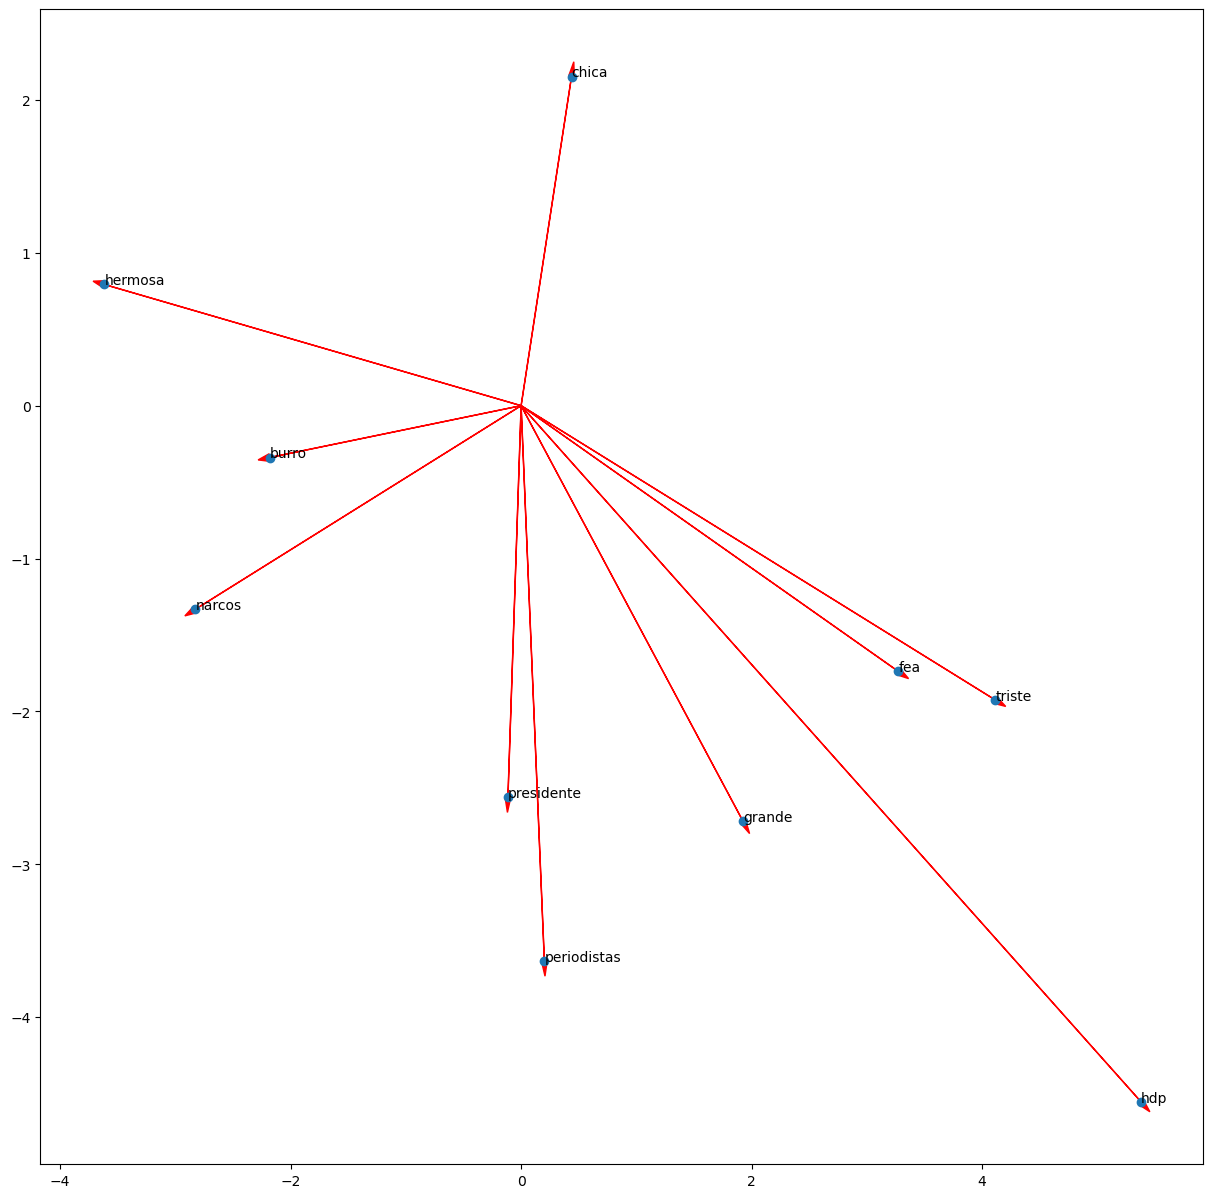

In [88]:
subsetwords = ["triste", "hermosa", "fea", "chica", "grande", "burro", "hdp", "presidente", "narcos", "periodistas"]
ploted_subsetwords = []
subreduced_matrix = []

for idx, word in enumerate(target_words):
    if word in subsetwords:
        ploted_subsetwords.append(word)
        subreduced_matrix.append(reduced_matrix[idx])

subreduced_matrix = np.array(subreduced_matrix)

fig, ax = plt.subplots(figsize=(15, 15))

for i, word in enumerate(subreduced_matrix):
    ax.arrow(0, 0, word[0], word[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.annotate(ploted_subsetwords[i], (word[0], word[1]))

ax.scatter(subreduced_matrix[:, 0], subreduced_matrix[:, 1])
plt.show()


Esta representación en comparación con la representación DOR parece tener un mayor costo computacional, debido al cálculo de $T_k$. Los resultados que podemos observar en la constelación de palabras parece haber dos centros en donde se agrupan las palabras. El centro de la izquierda mucho mas concurrido contiene palabras de la BoW, mientras que el centro de la izquierda mucho mas disperso y con menos cantidad de palabras contiene palabras en rojo (stopwords). En la gráfica de las palabras vectorizadas vemos evidentemente que las palabras con contextos similares se agrupan en la misma dirección, además antónimos parecen estar en direcciones opuestas como el caso de "hermosa" y "fea". Es una buena representación en el sentido de agrupar correctamente la semántica de las palabras.

**2. Programa y visualiza alguna implementación de Random Indexing.** 

Puedes hacer esto reusando parte del código del profesor en la Práctica 4 con DOR. Hacer al menos dos gráficas, la de constelación de palabras y subconjunto para ver algunas palabras con flechas.

---

Random Indexing es una técnica de representación de palabras que se utiliza para reducir la dimensionalidad de grandes conjuntos de datos de texto, de una manera eficiente y escalable. Es especialmente útil en contextos donde el uso de técnicas como el análisis semántico latente (LSA) puede ser computacionalmente costoso debido al tamaño del corpus. La idea básica detrás del Random Indexing es generar representaciones de palabras en un espacio de dimensiones significativamente reducido, preservando al mismo tiempo la similitud semántica entre ellas.

1. **Inicialización de Vectores Aleatorios:**
   - Cada término único en el corpus se asocia con un vector aleatorio inicial. Estos vectores tienen una dimensión mucho menor en comparación con el tamaño del vocabulario. Por ejemplo, mientras que el vocabulario puede tener miles o millones de términos únicos, los vectores aleatorios pueden tener solo unas pocas cientos de dimensiones.
   - Estos vectores aleatorios suelen ser dispersos, lo que significa que contienen principalmente ceros, con solo unos pocos elementos establecidos en 1 o -1. Esto ayuda a mantener la eficiencia del cálculo y la memoria.

2. **Acumulación de Contexto:**
   - A medida que se procesa el corpus, el contexto en el que aparece cada palabra se utiliza para actualizar un "vector de contexto" para esa palabra. Esto se hace sumando los vectores aleatorios de las palabras del contexto al vector de contexto de la palabra objetivo.
   - El "contexto" se define por las palabras que aparecen en su vecindad inmediata.

3. **Construcción de la Representación Semántica:**
   - A través de este proceso de acumulación, el vector de contexto de una palabra comienza a reflejar los patrones de co-ocurrencia de esa palabra con otras palabras en el corpus. Es decir, palabras que frecuentemente aparecen en contextos similares terminan teniendo vectores de contexto similares.

Para construir una representación de random indexing, partimos de la representación de BoW.

In [122]:
def compute_RandomIndexing(TR):
    # Dimensiones del BOW y el espacio reducido
    vocab_size = TR.shape[1]  # Tamaño total del vocabulario
    len_index = int(vocab_size / 10)  # Tamaño reducido para los vectores aleatorios

    # Inicializamos los vectores de contexto para cada palabra en el espacio reducido
    DTR = np.zeros((vocab_size, len_index), dtype=float)

    # Generamos un vector aleatorio para cada palabra en el vocabulario
    # Usamos una distribución que genere -1, 0, 1 para asegurar la dispersión
    random_vectors = np.random.randint(-1, 2, size=(vocab_size, len_index))

    # Iteramos sobre cada documento
    for doc in TR:
        # Encontramos las posiciones no nulas (palabras presentes en el documento)
        non_zero_positions = np.nonzero(doc)[0]

        # Actualizamos el vector de contexto para cada palabra basándonos en su co-ocurrencia
        for i in non_zero_positions:
            for j in non_zero_positions:
                if i != j:  # Aseguramos que no estamos sumando la palabra con ella misma
                    # Sumamos el vector aleatorio de la palabra co-ocurrente al vector de contexto
                    DTR[i, :] += random_vectors[j, :]

    return DTR

In [126]:
RandomI_base = compute_RandomIndexing(BOW_tr)
RandomI_base[:10][:10]

array([[-1262., -3491.,    94., ...,  1031., -2249.,   300.],
       [ -526., -4051.,  2101., ...,   839., -2895.,   -27.],
       [ -664., -3615.,   209., ...,  -303., -2444.,  -265.],
       ...,
       [  -19., -1204.,   118., ...,  -331.,  -977.,   -63.],
       [ -726., -2347.,  1126., ...,  -405., -2399.,  -798.],
       [ -276., -1763.,   251., ...,  -479., -1005.,  -126.]])

In [127]:
print(f"Las dimensiones de la matriz: ", RandomI_base.shape[0], RandomI_base.shape[1])

Las dimensiones de la matriz:  5000 500


Ahora, realizamos el mismo proceso para poder realizar la visualización. No es necesario construir nuevamente la lista `target_words`ya que ya la construimos en el punto anterior. 

In [130]:
target_matrix = np.array([RandomI_base[dict_indices[word]] for word in target_words])

In [131]:
target_matrix.shape

(1000, 500)

In [132]:
from sklearn.manifold import TSNE

# Crea una instancia de TSNE
tsne = TSNE(n_components=2)  # n_components=2 indica el número de dimensiones a las que quieres reducir tus datos

# Utiliza fit_transform para reducir la dimensionalidad
reduced_matrix = tsne.fit_transform(target_matrix)

In [133]:
reduced_matrix.shape

(1000, 2)

In [128]:
max_x = np.amax(reduced_matrix, axis = 0)[0]
max_y = np.amax(reduced_matrix, axis = 0)[1]

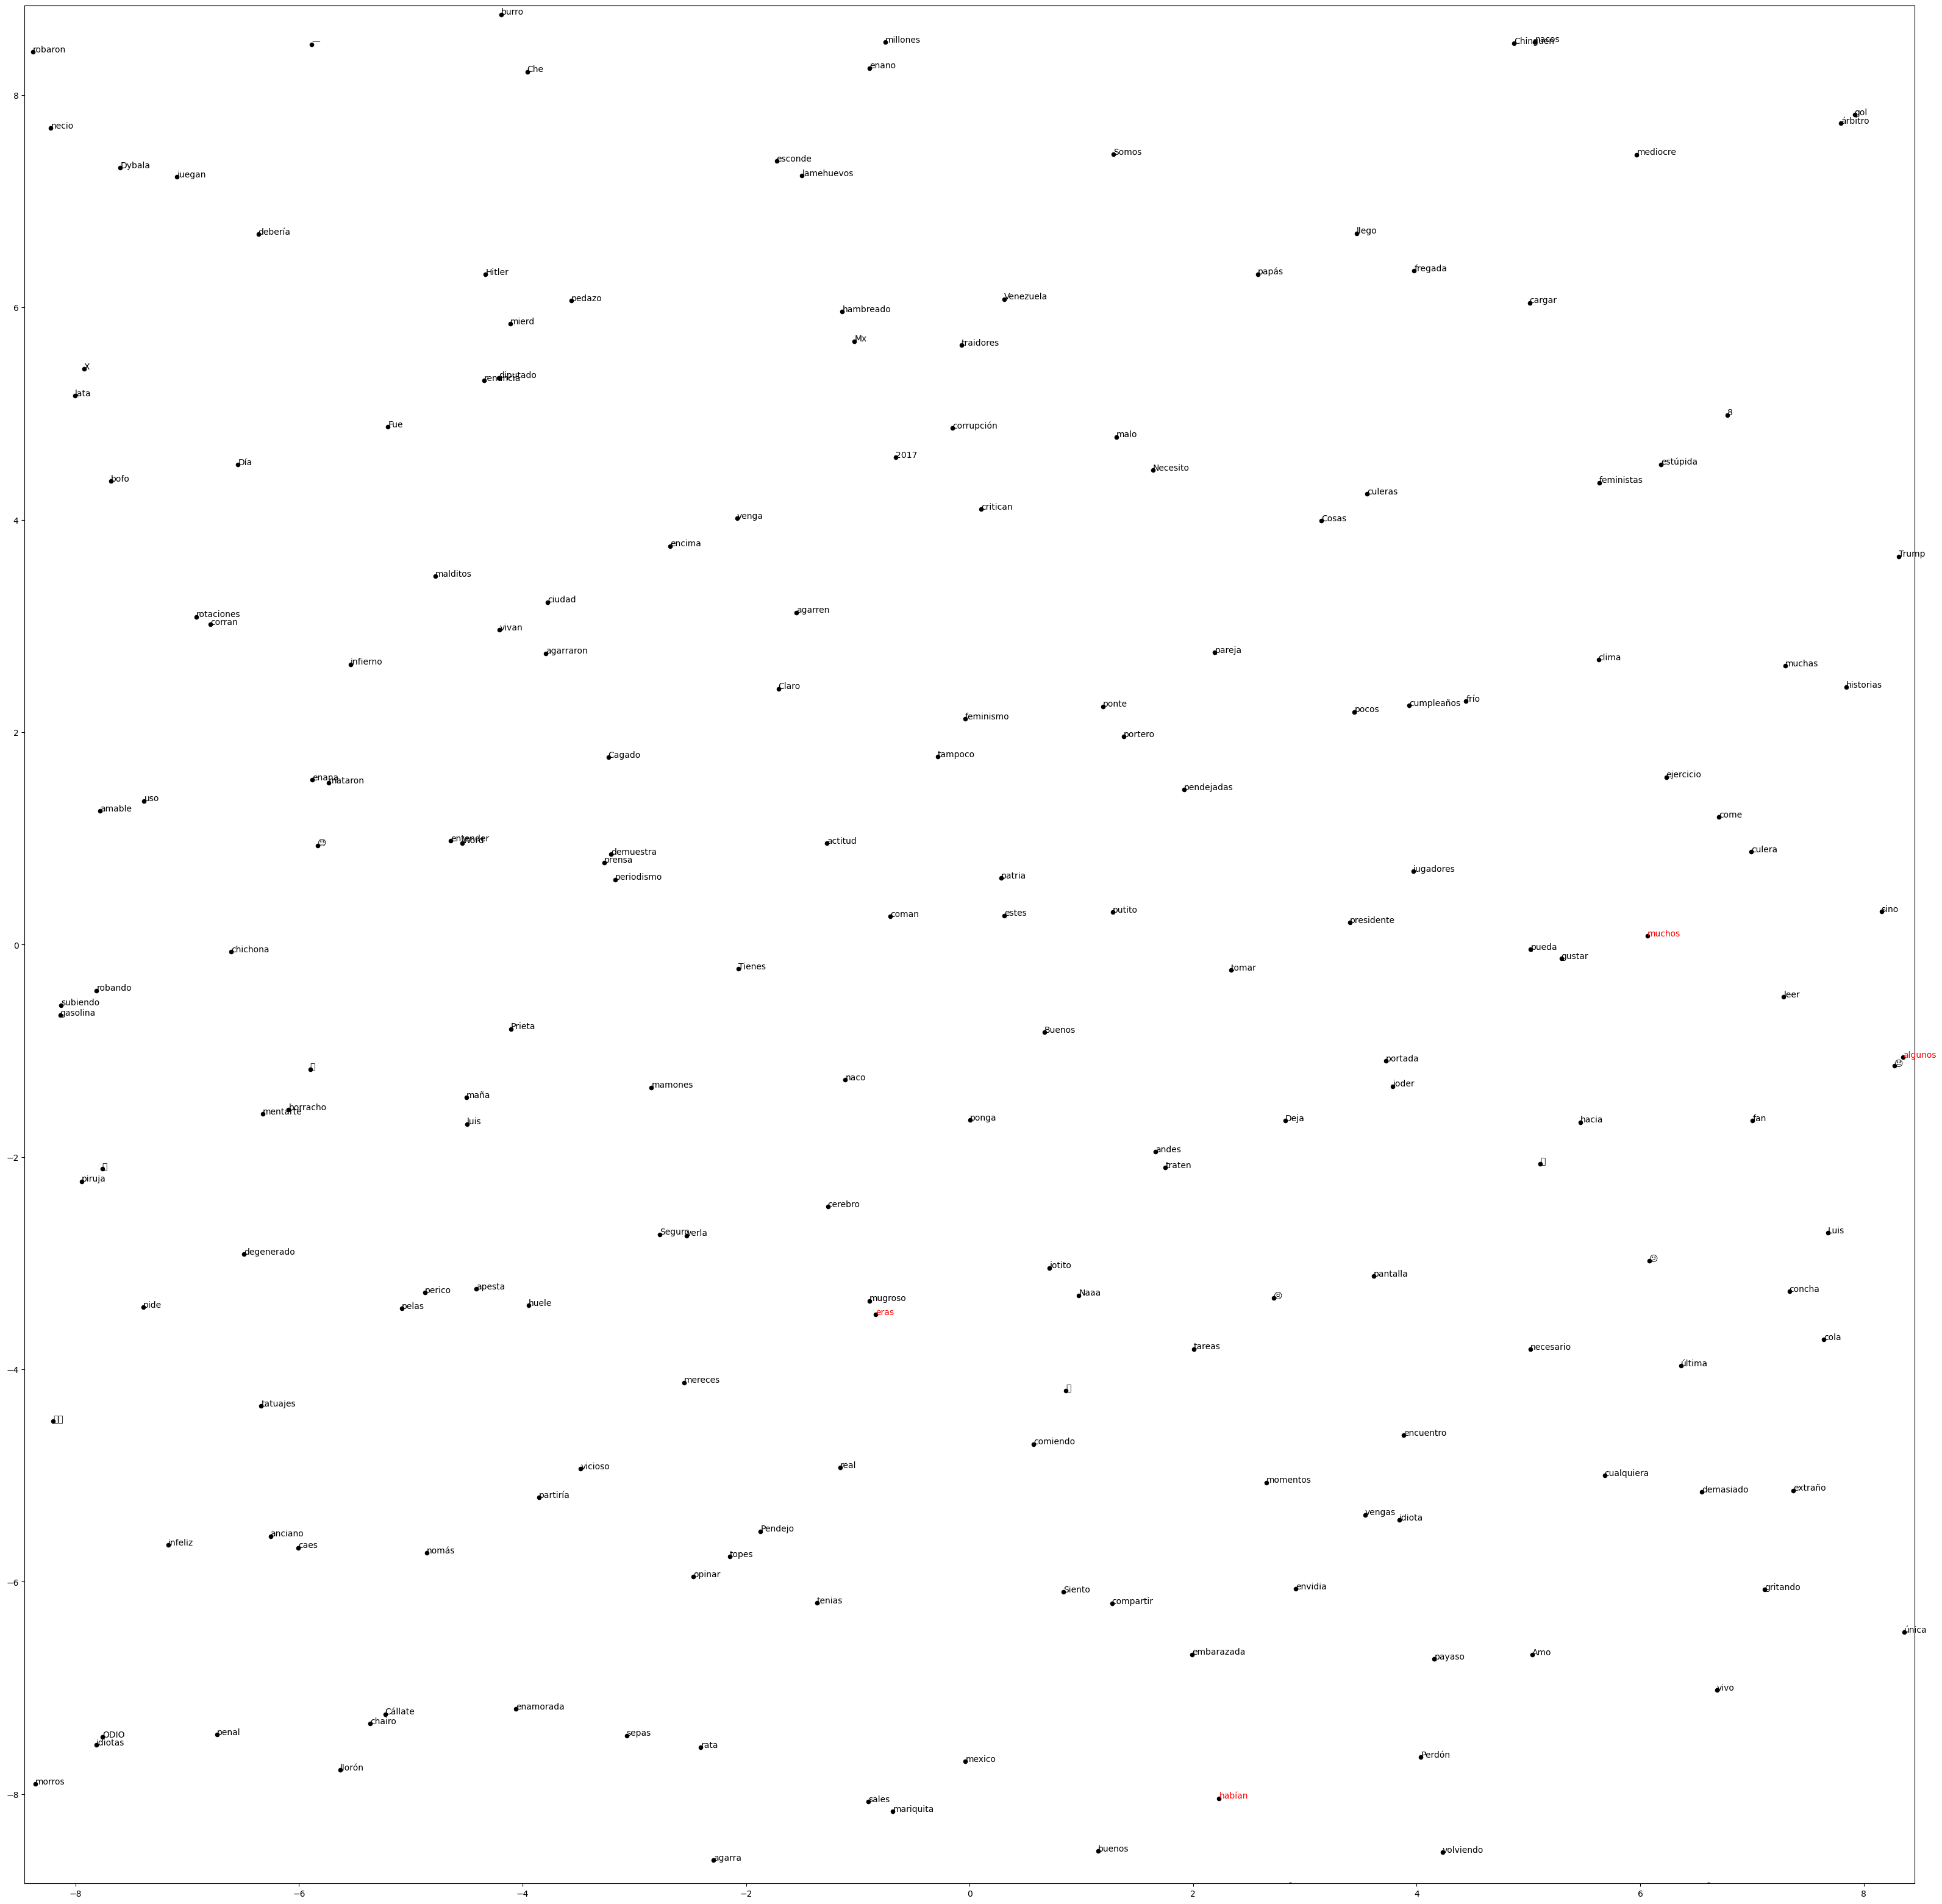

In [134]:
import matplotlib.pyplot as plt
import warnings
import nltk
nltk.data.path.append('/Users/guillermo_sego/anaconda3/nltk_data/') # path

# Suprimir advertencias
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
sw = set(stopwords.words("spanish"))

plt.figure(figsize=[40, 40], dpi=100)
plt.xlim((-max_x, max_x))
plt.ylim((-max_y, max_y))

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black")

for idx, word in enumerate(target_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    
    if word in sw:
        plt.annotate(word, (x, y), color="red")
    else:
        plt.annotate(word, (x, y), color="black")


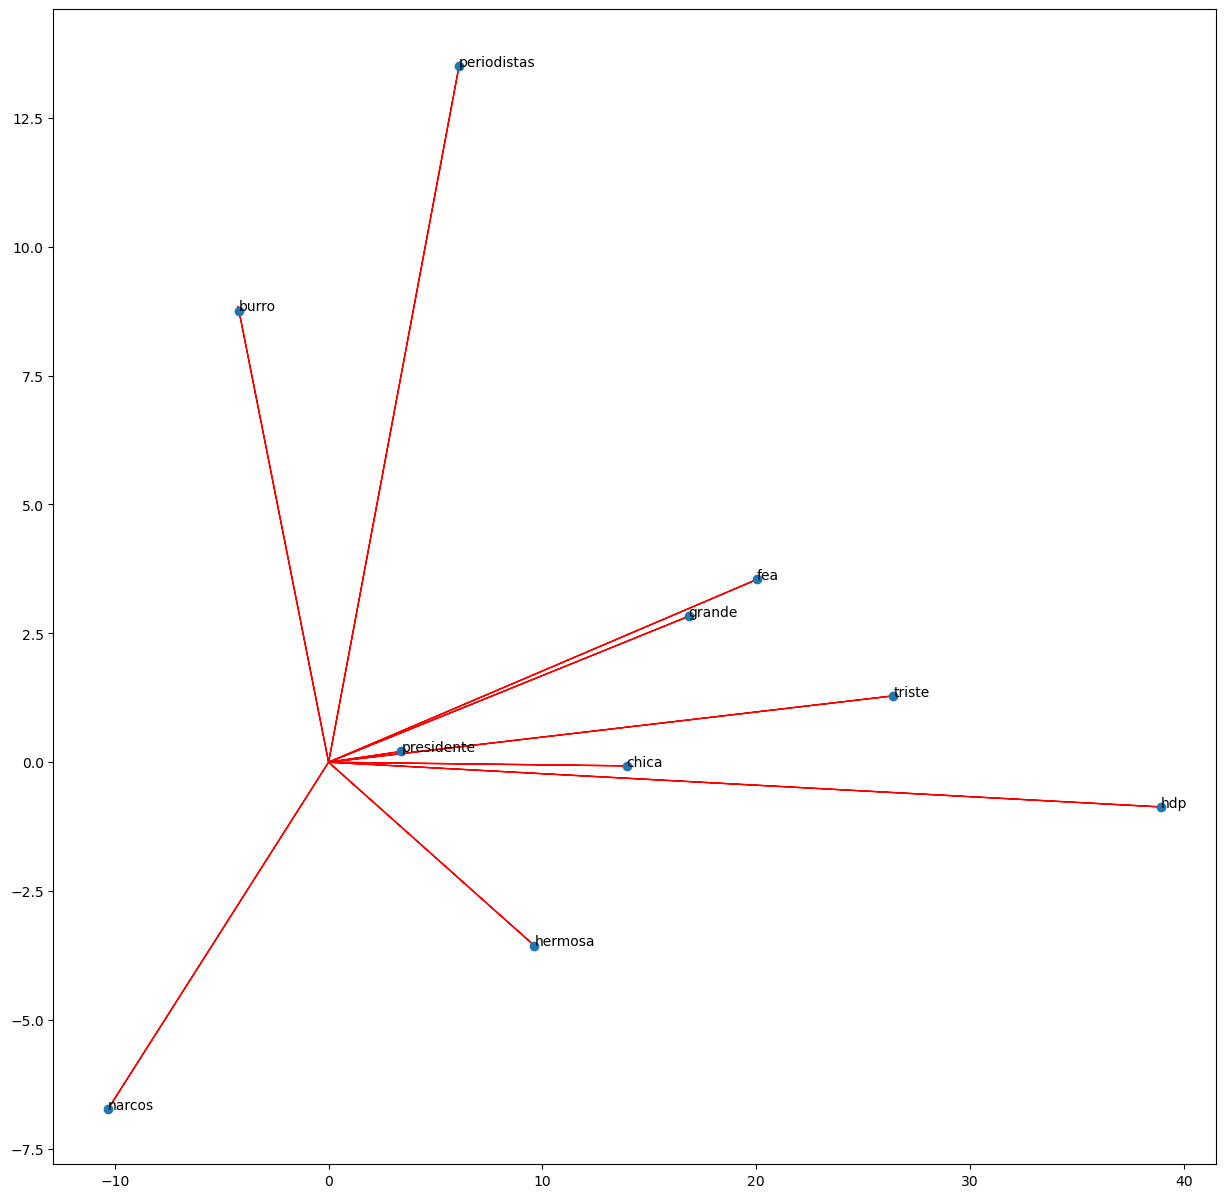

In [135]:
subsetwords = ["triste", "hermosa", "fea", "chica", "grande", "burro", "hdp", "presidente", "narcos", "periodistas"]
ploted_subsetwords = []
subreduced_matrix = []

for idx, word in enumerate(target_words):
    if word in subsetwords:
        ploted_subsetwords.append(word)
        subreduced_matrix.append(reduced_matrix[idx])

subreduced_matrix = np.array(subreduced_matrix)

fig, ax = plt.subplots(figsize=(15, 15))

for i, word in enumerate(subreduced_matrix):
    ax.arrow(0, 0, word[0], word[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.annotate(ploted_subsetwords[i], (word[0], word[1]))

ax.scatter(subreduced_matrix[:, 0], subreduced_matrix[:, 1])
plt.show()


Esta representación parece mucho mas dispersa que las representaciones DOR y TCOR. De hecho en la gráfica de las constelaciones es una representación que parece homogénea, lo cual indica que no es una buena representación ya que no es posible la fiabilidad en las distancias de los vectores. De hecho en la gráfica de los vectores de palabras no hay una relación semántica aparente entre las palabras, siento una mala representación para visualizar esto. Es posible que si se prueba esta representación en un modelo de clasificación puede que sea superior a las representación DOR y TCOR pero para términos de visualización y de relaciones semánticas no fue una buena representación.

**3. Use alguna de las DTRs anteriores por separado de alguna forma para clasificación de documentos** 

(e.g., promedio de vectores de términos en cada documento para representar). Compárelas contra un BoW-TFIDF de 5000 palabras más frecuentes.

---

Necesitamos primero una TFIDF. Utilizamos la función que habíamos realizado en la tarea 2. 

In [136]:
def build_bow_tfidf(tr_text, vocabulary, dict_indices):
    # Construcción de matriz para la bolsa de palabras
    BOW = np.zeros((len(tr_text), len(vocabulary)), dtype=float) # Usamos float ya que tfidf contiene valores flotantes

    # Calculamos el IDF para cada palabra en el vocabulario
    # Necesitamos saber el número de documentos que contiene cada palabra. Realizamos esto con un diccionario
    doc_count = {word: 0 for word in dict_indices} # Inicializar diccionario
    for tr in tr_text:
        tokens = set(tokenizer.tokenize(tr))  # Convertimos a set para obtener palabras únicas
        for token in tokens:
            if token in dict_indices:  # Si la palabra está en el vocabulario
                doc_count[token] += 1

    # Iteramos sobre cada documento en tr_text
    for idx, tr in enumerate(tr_text):

        # Cada documento tr lo tokenizamos
        tokens = nltk.FreqDist(tokenizer.tokenize(tr))

        # Calculamos la frecuencia de cada palabra en el documento
        fdist_doc = nltk.FreqDist(tokens)

        # Iteramos sobre cada palabra y su frecuencia en el documento
        for word, freq in fdist_doc.items():
            if word in dict_indices:
                tf = freq / len(tokens)  # TF: Frecuencia de la palabra / total de palabras en el documento
                idf = np.log(len(tr_text) / doc_count[word])  # IDF: log(Total de documentos / úmero de documentos que contienen la palabra)
                BOW[idx, dict_indices[word]] = tf * idf

    return BOW

In [140]:
BOW_tfidf = build_bow_tfidf(tr_text, voc, dict_indices)
BOW_tfidf[:10][:10]

array([[0.        , 0.07149705, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08579646, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05046851, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04289823, 0.04530089, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06471556, ..., 0.        , 0.        ,
        0.        ]])

Bolsa de palabras de validación con TFIDF

In [153]:
BOW_val = build_bow_tfidf(val_text, voc, dict_indices)

Evaluamos la bolsa de palabra con pesado TFIDF.

In [137]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score

In [154]:
import warnings

# Suprimir advertencias
warnings.filterwarnings('ignore')

parameters = {'C': [0.05, .12, .25, .5, 1, 2, 4]}

# Máquina de soporte vectorial con balance de clases
srv = svm.LinearSVC(class_weight='balanced', dual=False, max_iter=10000)
grid = GridSearchCV(estimator=srv, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

# Entrenamiento y búsqueda de hiperparámetros
grid.fit(BOW_tfidf, tr_labels)

# Predicciones sobre el conjunto de validación
y_pred = grid.predict(BOW_val)

# Cálculo de métricas
precision, recall, f1_score, _ = precision_recall_fscore_support(val_labels, y_pred, average="macro")
print(metrics.classification_report(val_labels, y_pred))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

              precision    recall  f1-score   support

          0
       0.89      0.87      0.88       418
          1
       0.69      0.74      0.72       169

    accuracy                           0.83       587
   macro avg       0.79      0.80      0.80       587
weighted avg       0.84      0.83      0.83       587

Precision: 0.7932
Recall: 0.8040
F1-Score: 0.7982


In [175]:
BOW_val.shape

(587, 5000)

Para utilizar la matriz de co-ocurrencia TCOR en tareas de clasificación de documentos, necesitamos adaptar su uso de manera que cada documento se represente adecuadamente en el espacio de características creado por la TCOR. La matriz TCOR en sí misma representa relaciones entre términos, pero para la clasificación de documentos, necesitamos extrapolar estas relaciones para describir los documentos individualmente.

Una posible manera de hacer esto es crear vectores de características para cada documento basándonos en la información de co-ocurrencia de términos. De esta manera en lugar de trabajar directamente con la matriz TCOR global, se pueden ponderar las co-ocurrencias de términos para cada documento. 

Implementamos esto en una función. Para poder utilizar la información de las co-ocurrencias, hacemos una construcción de una bolsa de palabras. Sin embargo, para integrar la información de la representación TCOR, sumamos los valores de co-ocurrencia de cada palabra (i) en el documento con todas las demás palabras (j) presentes en el mismo documento, proporcionando una suma de co-ocurrencias como el nuevo peso. Prácticamente usamos la matriz TCOR como peso. 


In [195]:
def build_TCOR_features(tr_text, vocabulary, dict_indices, TCOR_base):
    TCOR_features = np.zeros((len(tr_text), len(vocabulary)), dtype=int)

    for idx, tr in enumerate(tr_text):
        # Tokenizamos cada documento
        tokens = nltk.FreqDist(tokenizer.tokenize(tr))
        token_indices = [dict_indices[word] for word in tokens if word in dict_indices]

        # Sumamos los valores de co-ocurrencia para cada palabra en el contexto del documento
        for i in token_indices:
            for j in token_indices:
                if i != j:  # Evitar sumar la co-ocurrencia de una palabra consigo misma
                    TCOR_features[idx, i] += TCOR_base[i, j]

    return TCOR_features

In [196]:
TCOR_features_tr = build_TCOR_features(tr_text, voc, dict_indices, TCOR_base)

In [197]:
TCOR_features_tr.shape

(5278, 5000)

Ahora calculamos la matriz para validación

In [198]:
TCOR_val = compute_tcor(BOW_val)
TCOR_features_val = build_TCOR_features(val_text, voc, dict_indices, TCOR_val)

In [199]:
TCOR_features_val.shape

(587, 5000)

Ahora si tenemos lo necesario para poder realizar la prueba de clasificación.

In [200]:
import warnings

# Suprimir advertencias
warnings.filterwarnings('ignore')

parameters = {'C': [0.05, .12, .25, .5, 1, 2, 4]}

# Máquina de soporte vectorial con balance de clases
svc = svm.LinearSVC(class_weight='balanced', dual=False, max_iter=10000)
grid = GridSearchCV(estimator=svc, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

# Entrenamiento y búsqueda de hiperparámetros utilizando TCOR
grid.fit(TCOR_features_tr, tr_labels)

# Predicciones sobre el conjunto de validación de TCOR
y_pred = grid.predict(TCOR_features_val) 

# Cálculo de métricas
precision, recall, f1_score, _ = precision_recall_fscore_support(val_labels, y_pred, average="macro")
print(metrics.classification_report(val_labels, y_pred))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/User

              precision    recall  f1-score   support

          0
       0.88      0.65      0.75       418
          1
       0.48      0.79      0.60       169

    accuracy                           0.69       587
   macro avg       0.68      0.72      0.67       587
weighted avg       0.77      0.69      0.71       587

Precision: 0.6810
Recall: 0.7200
F1-Score: 0.6731


Los valores calculados para la presición, el recall y el F1-Score son inferiores a los calculados para la Bolsa de palabras con pesado TFIDF. Esto nos confirma que si bien este tipo de representaciones son bastante útiles para conocer la relación existente entre las palabras, no es muy recomendable su uso para clasificar. 

**4. Bajo la representación TCOR de los términos, y asumiendo un vocabulario de 5000 palabras, muestre por orden de mayor similitud coseno (ver chp 6 del libro de Dan) los 10 pares de palabras más parecidas en toda la colección.**

Para encontrar los 10 pares de palabras más similares en una colección, utilizando una matriz de co-ocurrencia (TCOR) y asumiendo un vocabulario de 5000 primero necesitamos calcular la similitud coseno entre cada par de vectores de palabras. La similitud coseno mide el coseno del ángulo entre dos vectores en un espacio multidimensional, lo cual es una medida de su orientación relativa y, por lo tanto, una indicación de su similitud. La similitud coseno se define como el producto punto de los dos vectores dividido por el producto de sus magnitudes.

Luego hay que enumerar todas las combinaciones posibles de pares de palabras. Dado que tenemos un vocabulario de 5000 palabras, necesitarás considerar todas las combinaciones posibles de pares de palabras sin repetir pares, es decir, (palabra1, palabra2) es lo mismo que (palabra2, palabra1) y solo debe contarse una vez.

Una vez que hayamos calculado la similitud coseno para cada par, ordenamos los pares de palabras de mayor a menor similitud coseno. Finalmente, seleccionamos los 10 pares superiores de la lista ordenada.

Este proceso puede ser computacionalmente costoso debido al número de comparaciones necesarias, que es del orden de $\frac{5000 \times 4999}{2}$ pares. Para hacerlo más manejable, se puede utilizar la matriz de co-ocurrencia junto con operaciones vectorizadas.

In [209]:
from sklearn.metrics.pairwise import cosine_similarity

# Cada fila de TCOR_base representa el vector de co-ocurrencia de un término
# Calcular la similitud coseno para todos los pares de vectores de términos
similarity_matrix = cosine_similarity(TCOR_base)

# Hacer cero la diagonal principal para excluir la similitud de términos consigo mismos
np.fill_diagonal(similarity_matrix, 0)

Ahora, encontramos los índices de los 10 valores más altos en la matriz de similitud. Utilizamos el diccionario de índices invertido que construimos.

In [223]:
# Obtenemos los índices de la matriz triangular superior para evitar duplicados
ix = np.triu_indices_from(similarity_matrix, k=1)
top_ten_indices = np.argpartition(similarity_matrix[ix], -10)[-10:]
top_ten_pairs = [(ix[0][i], ix[1][i]) for i in top_ten_indices]

# Traducir estos índices a palabras usando tu vocabulario
top_ten_words = [(dict_indices_invertido[i], dict_indices_invertido[j]) for i, j in top_ten_pairs]

# Imprimir los pares de palabras y sus similitudes
for i, j in top_ten_pairs:
    word_pair = (dict_indices_invertido[i], dict_indices_invertido[j])
    similarity_score = similarity_matrix[i, j]
    print(f"{word_pair}: {similarity_score}")

('de', 'la'): 0.882161495160414
('de', 'y'): 0.8839296932123569
('que', '.'): 0.8890286427681503
('de', '.'): 0.8948065198007045
(',', 'que'): 0.8964300915719492
('de', 'que'): 0.8971254793729277
('“', '”'): 0.9527170921687537
('(', ')'): 0.9352576581462851
(',', '.'): 0.9050177173361607
(',', 'de'): 0.8991544639175922


**5. Bajo la representación BoW-TFIDF de los documentos, y asumiendo un vocabulario de 5000 palabras, muestre en por orden de más similitud coseno (ver chp 6 del libro de Dan) los 10 pares de documentos más parecidos en toda la colección. Muestre el texto que contienen y muestre la categoría de cada uno.**

Hacemos un procedimiento similar al de la matriz TCOR, cambiamos ligeramente el procedimiento de TCOR. La clave es trabajar con los documentos como vectores en lugar de términos individuales, y luego encontrar los pares de documentos con la mayor similitud coseno, excluyendo las auto-similitudes es decir, la similitud de un documento consigo mismo.

In [242]:
BOW_tfidf_lim = BOW_tfidf[:5000][:]

# Calcular la matriz de similitud coseno entre los documentos
similarity_matrix = cosine_similarity(BOW_tfidf_lim)

# Poner a cero la diagonal principal para excluir la auto-similitud
np.fill_diagonal(similarity_matrix, 0)

# Obtener los índices de la matriz triangular superior para evitar duplicados
ix = np.triu_indices_from(similarity_matrix, k=1)

# Encontrar los índices de los 10 mayores valores de similitud
top_ten_indices = np.argpartition(similarity_matrix[ix], -10)[-10:]

# Convertir los índices a pares de documentos
top_ten_pairs = [(ix[0][i], ix[1][i]) for i in top_ten_indices]

# Imprimir los pares de documentos y sus similitudes
for i, j in top_ten_pairs:
    similarity_score = similarity_matrix[i, j]
    print(f"Par de documentos: ({i}, {j}) con similitud {similarity_score:.4f}")
    print(f"Documento {i} texto: {tr_text[i]}")
    print("No Agresivo" if tr_labels[i] == "0" else "Agresivo")
    print(f"Documento {j} texto: {tr_text[j]}")
    print("No Agresivo" if tr_labels[j] == "0" else "Agresivo")
    print("\n") 

Par de documentos: (426, 4853) con similitud 0.9235
Documento 426 texto: En honor a la Madre Teresa de Calcuta, el Día Internacional de la Beneficencia se conmemora #UnDíaComoHoy.

Agresivo
Documento 4853 texto: #SabíasQue en honor a la Madre Teresa de Calcuta, hoy conmemoramos el Día Internacional de la Beneficencia.

Agresivo


Par de documentos: (1601, 1818) con similitud 0.9241
Documento 1601 texto: Para vos también pollo... y no me importa lo que digan esos putos periodistas la puta que los parió 🎶🎶🎶🎶

Agresivo
Documento 1818 texto: y no me importa lo que digan esos putos periodistas la puta que los parió 🎶🎶🎶🎶 también es para vos...

Agresivo


Par de documentos: (1123, 2363) con similitud 0.9944
Documento 1123 texto: Bajate pero a mamar mi verga no pares que te quiero hacer romper tu culo a vergazos

Agresivo
Documento 2363 texto: @USUARIO Bajate pero a mamar mi verga no pares que te quiero hacer romper tu culo a vergazos

Agresivo


Par de documentos: (281, 283) con similitud 0.

**6.Implemente Ganancia de Información o Chi2 como lo sugiere Baeza-Yates (no función de sklearn ni similar) para descubrir el top 50 de las palabras más relevantes de TODA la colección.**

Haga una gráfica también con la herramienta de word_cloud dónde el tamaño de la palabra corresponda a su ganancia de [información](https://amueller.github.io/word_cloud/)

---

**Chi Square** (documento Beaza-Yates)

The chi square metric quantifies the lack of independence between term $k_i$ and class $c_p$. It is a statistical metric defined as follows.
$$
\chi^2\left(k_i, c_p\right)=\frac{N_t\left(P\left(k_i, c_p\right) P\left(\neg k_i, \neg c_p\right)-P\left(k_i, \neg c_p\right) P\left(\neg k_i, c_p\right)\right)^2}{P\left(k_i\right) P\left(\neg k_i\right) P\left(c_p\right) P\left(\neg c_p\right)}
$$

Using the probabilities defined in section 8.5.1, we can write
$$
\begin{aligned}
\chi^2\left(k_i, c_p\right) & =\frac{N_t\left(n_{i, p}\left(N_t-n_i-n_p+n_{i, p}\right)-\left(n_i-n_{i, p}\right)\left(n_p-n_{i, p}\right)\right)^2}{n_p\left(N_t-n_p\right) n_i\left(N_t-n_i\right)} \\
& =\frac{N_t\left(N_t n_{i, p}-n_p n_i\right)^2}{n_p n_i\left(N_t-n_p\right)\left(N_t-n_i\right)}
\end{aligned}
$$

EVALUATION METRICS $\quad 325$
To apply feature selection to term $k_i$, we compute either average or max term values of chi square as follows.
$$
\begin{aligned}
\chi_{\text {avg }}^2\left(k_i\right) & =\sum_{p=1}^L P\left(c_p\right) \chi^2\left(k_i, c_p\right) \\
\chi_{\text {max }}^2\left(k_i\right) & =\max _{p=1}^L \chi^2\left(k_i, c_p\right)
\end{aligned}
$$

The feature selection process works as follows.
Feature Selection by Chi Square. Let $K_{t h}$ be a threshold on chi square. Then, all terms $k_i$ for which $\chi_{a v g}^2\left(k_i\right) \geq K_{t h}$ (or alternatively, $\chi_{\text {max }}^2\left(k_i\right) \geq$ $K_{t h}$ ) are retained, all other terms are discarded. Documents representations are recomputed to consider only the terms retained.

---

La métrica Chi-cuadrado ($\chi^2$) es una medida estadística que se utiliza para determinar si existe una relación significativa entre dos variables categóricas. Como en el método propuesto por Baeza-Yates, el Chi-cuadrado se utiliza para evaluar la importancia de un término (palabra o frase) en relación con una categoría o clase específica de documentos. La idea es identificar los términos que son más distintivos o característicos de cada clase, lo cual es útil para tareas como la clasificación de texto, la selección de características, o simplemente para entender mejor el contenido de una colección de documentos.

La implementación de la métrica Chi-cuadrado para este propósito implica lo siguiente:

1. **Tabla de contingencia:** Para cada término, se construye una tabla de contingencia con respecto a cada clase. La tabla cuenta cuántas veces el término aparece en documentos de la clase y cuántas veces aparece en documentos fuera de la clase, así como cuántas veces no aparece en ambos casos. Esto nos da cuatro valores: $n_{i,p}$, $n_{i,\bar{p}}$, $n_{\bar{i},p}$, y $n_{\bar{i},\bar{p}}$, que representan, respectivamente, el término presente y documento de clase $p$, término presente y documento no de clase $p$, término ausente y documento de clase $p$, y término ausente y documento no de clase $p$.

2. **Cálculo de Chi-cuadrado:** Con los valores de la tabla de contingencia, se calcula el estadístico Chi-cuadrado para cada término con respecto a cada clase. Esto mide qué tan asociado está el término con la clase, siendo valores más altos indicativos de una mayor asociación.

3. **Selección de características:** Los términos se ordenan según sus puntuaciones de Chi-cuadrado, y se seleccionan los más altos como los más relevantes para la clase. Esto ayuda a identificar los términos que mejor distinguen los documentos de una clase de los de otras clases.

In [276]:
# Paso 1: Calcular la tabla de contingencia para cada término y clase
def calculate_contingency_table(term, class_label, documents, labels, voc):
    n_i_p = 0  # Término está presente y documento pertenece a clase p
    n_i_not_p = 0  # Término está presente y documento no pertenece a clase p
    n_not_i_p = 0  # Término no está presente y documento pertenece a clase p
    n_not_i_not_p = 0  # Término no está presente y documento no pertenece a clase p

    # Verificar si el término está en el vocabulario
    if term in voc:
        for doc, label in zip(documents, labels):
            term_present = term in doc
            class_match = label == class_label

            if term_present and class_match:
                n_i_p += 1
            elif term_present and not class_match:
                n_i_not_p += 1
            elif not term_present and class_match:
                n_not_i_p += 1
            else:
                n_not_i_not_p += 1

    return n_i_p, n_i_not_p, n_not_i_p, n_not_i_not_p

# Paso 2: Calcular Chi-cuadrado para cada término con respecto a cada clase
def chi_square(n_i_p, n_i_not_p, n_not_i_p, n_not_i_not_p):
    N_t = n_i_p + n_i_not_p + n_not_i_p + n_not_i_not_p
    numerator = N_t * ((n_i_p * n_not_i_not_p - n_i_not_p * n_not_i_p) ** 2)
    denominator = (n_i_p + n_i_not_p) * (n_not_i_p + n_not_i_not_p) * (n_i_p + n_not_i_p) * (n_i_not_p + n_not_i_not_p)
    return numerator / denominator if denominator != 0 else 0

In [277]:
vocabulary = [word[1] for word in voc] # Lista con vocabulario

# Paso 3: Seleccionar las características basadas en Chi-cuadrado
chi_scores = {}
for term in vocabulary:  # Iterar sobre cada término en el vocabulario
    chi_avg = 0
    chi_max = 0
    for class_label in set(tr_labels):
        n_i_p, n_i_not_p, n_not_i_p, n_not_i_not_p = calculate_contingency_table(term, class_label, tr_text, tr_labels, vocabulary)
        chi_value = chi_square(n_i_p, n_i_not_p, n_not_i_p, n_not_i_not_p)
        chi_avg += chi_value * (tr_labels.count(class_label) / len(tr_labels))
        chi_max = max(chi_max, chi_value)
    chi_scores[term] = chi_avg 

# Selecciona los top 50 términos
top_50_terms = sorted(chi_scores, key=chi_scores.get, reverse=True)[:50]

In [282]:
print("Los 50 términos mas relevantes son:")
print(list(top_50_terms))

Los 50 términos mas relevantes son:
['pinche', 'che', 'SU', 'put', 'HDP', 'I', 'O', 'P', '@', 'USUARIO', '@USUARIO', 'pendejo', 'dejo', 'hdp', 'U', 'R', 'puto', 'hijo', 'putos', 'A', 'loca', 'maricon', 'he', 'mierd', 'in', 'mierda', 'S', 'Pinche', 'pi', 'ches', 'toy', 'rico', 'gol', 'pinches', 'estoy', 'golfa', 'pendejos', 'HIJO', 'perra', 'ca', 'chinga', 'Putos', 'tu', 'lameculos', 'joto', 'me', 'DE', 'Puto', 'culo', 'D']


El WordCloud (o nube de palabras) es una representación visual que muestra los términos más relevantes de un conjunto de texto, donde el tamaño de cada término indica su frecuencia o importancia. En este contexto de la implementación de Chi-cuadrado, un WordCloud puede utilizarse para visualizar los términos más característicos de toda la colección o de categorías específicas dentro de la colección, según las puntuaciones de Chi-cuadrado. Los términos con puntuaciones más altas de Chi-cuadrado aparecerán más grandes en el WordCloud, lo que proporciona una representación intuitiva de su relevancia.

El propósito de la gráfica de WordCloud en este contexto es ofrecer una manera visual y fácil de comprender qué términos son más distintivos y relevantes en la colección de documentos, basándose en su asociación estadística con las clases de documentos según el Chi-cuadrado. Esto puede ser particularmente útil para resumir el contenido de una colección de documentos y para resaltar las palabras clave que definen los temas o categorías dentro de la colección.

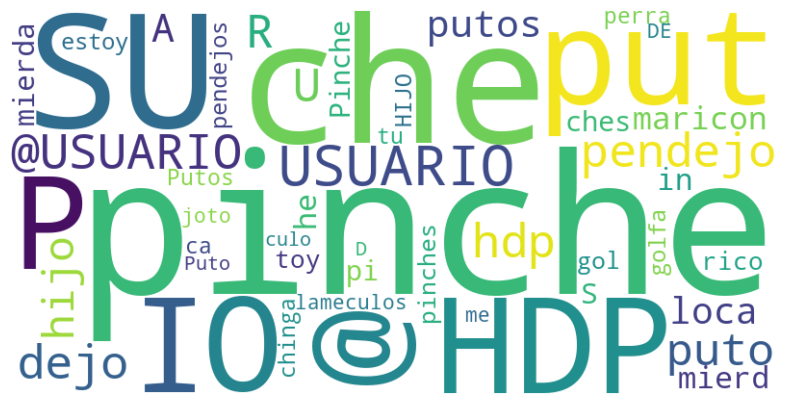

In [281]:
from wordcloud import WordCloud

# No necesitamos convertir de índices a términos, ya que `top_50_terms` ya contiene términos directamente
word_frequencies = {term: chi_scores[term] for term in top_50_terms if term in chi_scores}

# Generar el Word Cloud usando las frecuencias de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Mostrar el Word Cloud generado
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()
